In [1]:
import pandas as pd

data = {
    "OrderID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Date": [
        "2025-01-01", "2025-01-02", "2025-01-03", "2025-01-05", "2025-01-06",
        "2025-01-10", "2025-01-12", "2025-01-13", "2025-01-15", "2025-01-18"
    ],
    "City": ["Delhi", "Mumbai", "Delhi", "Bangalore", "Delhi",
             "Mumbai", "Bangalore", "Delhi", "Mumbai", "Bangalore"],
    "Category": ["Electronics", "Clothing", "Groceries", "Electronics", "Clothing",
                 "Groceries", "Electronics", "Clothing", "Groceries", "Electronics"],
    "Amount": [1500, 800, 400, 2000, 1200, 500, 2500, 900, 450, 3000],
    "Payment_Method": ["UPI", "Card", "Cash", "UPI", "Card",
                       "UPI", "Cash", "Card", "UPI", "Cash"]
}

df = pd.DataFrame(data)
df["Date"] = pd.to_datetime(df["Date"])   # Convert Date to datetime format
print(df)


   OrderID       Date       City     Category  Amount Payment_Method
0        1 2025-01-01      Delhi  Electronics    1500            UPI
1        2 2025-01-02     Mumbai     Clothing     800           Card
2        3 2025-01-03      Delhi    Groceries     400           Cash
3        4 2025-01-05  Bangalore  Electronics    2000            UPI
4        5 2025-01-06      Delhi     Clothing    1200           Card
5        6 2025-01-10     Mumbai    Groceries     500            UPI
6        7 2025-01-12  Bangalore  Electronics    2500           Cash
7        8 2025-01-13      Delhi     Clothing     900           Card
8        9 2025-01-15     Mumbai    Groceries     450            UPI
9       10 2025-01-18  Bangalore  Electronics    3000           Cash


In [2]:
print(df.dtypes)

OrderID                    int64
Date              datetime64[ns]
City                      object
Category                  object
Amount                     int64
Payment_Method            object
dtype: object


In [15]:
category_sales = df.groupby("Category")["Amount"].sum()
city_sales = df.groupby("City")["Amount"].sum()

In [21]:
print(category_sales)

Category
Clothing       2900
Electronics    9000
Groceries      1350
Name: Amount, dtype: int64


In [30]:
print(city_sales)

City
Bangalore    7500
Delhi        4000
Mumbai       1750
Name: Amount, dtype: int64


In [16]:
top3=df.nlargest(3,"Amount")
print(top3)

   OrderID       Date       City     Category  Amount Payment_Method   Weekday
9       10 2025-01-18  Bangalore  Electronics    3000           Cash  Saturday
6        7 2025-01-12  Bangalore  Electronics    2500           Cash    Sunday
3        4 2025-01-05  Bangalore  Electronics    2000            UPI    Sunday


In [17]:
df["Weekday"] = df["Date"].dt.day_name()


In [18]:
df

,OrderID,Date,City,Category,Amount,Payment_Method,Weekday
0,1,2025-01-01,Delhi,Electronics,1500,UPI,Wednesday
1,2,2025-01-02,Mumbai,Clothing,800,Card,Thursday
2,3,2025-01-03,Delhi,Groceries,400,Cash,Friday
3,4,2025-01-05,Bangalore,Electronics,2000,UPI,Sunday
4,5,2025-01-06,Delhi,Clothing,1200,Card,Monday
5,6,2025-01-10,Mumbai,Groceries,500,UPI,Friday
6,7,2025-01-12,Bangalore,Electronics,2500,Cash,Sunday
7,8,2025-01-13,Delhi,Clothing,900,Card,Monday
8,9,2025-01-15,Mumbai,Groceries,450,UPI,Wednesday
9,10,2025-01-18,Bangalore,Electronics,3000,Cash,Saturday


In [8]:
print("weekday sales: ")
df.groupby("Weekday")["Amount"].sum()

weekday sales: 


Weekday
Friday        900
Monday       2100
Saturday     3000
Sunday       4500
Thursday      800
Wednesday    1950
Name: Amount, dtype: int64

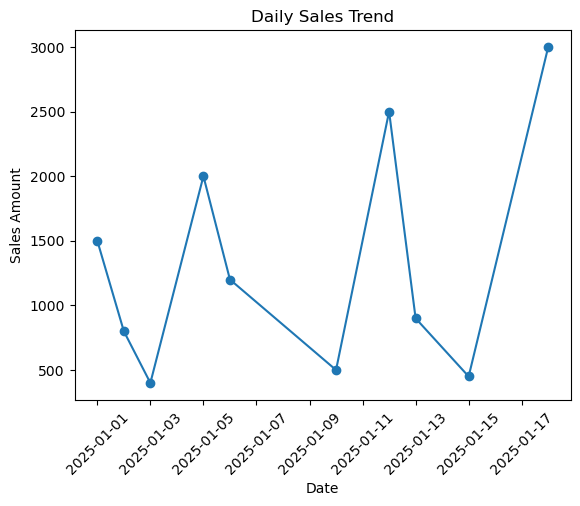

In [19]:
import matplotlib.pyplot as plt
date_sales = df.groupby("Date")["Amount"].sum()

plt.plot(date_sales.index, date_sales.values, marker="o")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()


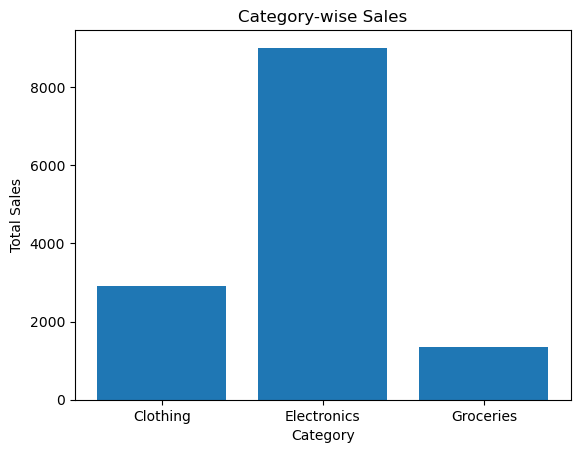

In [20]:
plt.bar(category_sales.index, category_sales.values)
plt.title("Category-wise Sales")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


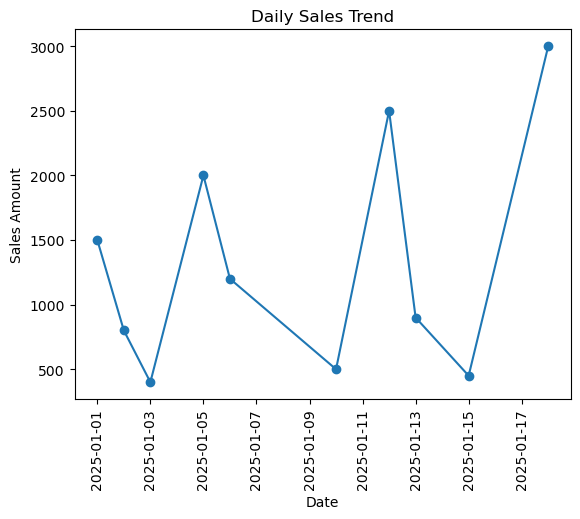

In [27]:
date_sales = df.groupby("Date")["Amount"].sum()

plt.plot(date_sales.index, date_sales.values, marker="o")
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales Amount")
plt.xticks(rotation=90)
plt.show()


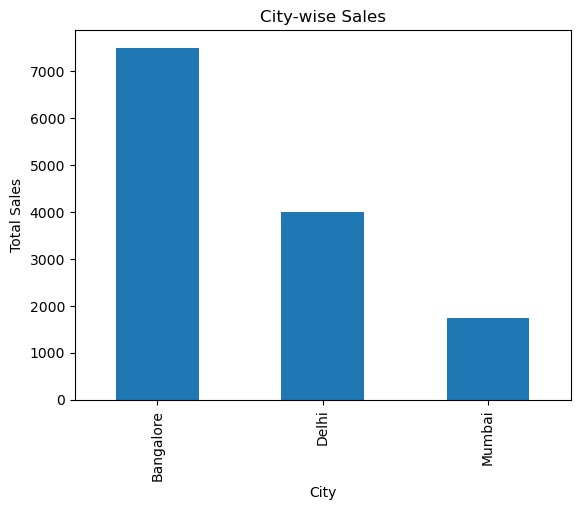

In [28]:
city_sales.plot(kind='bar')
plt.title("City-wise Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.show()

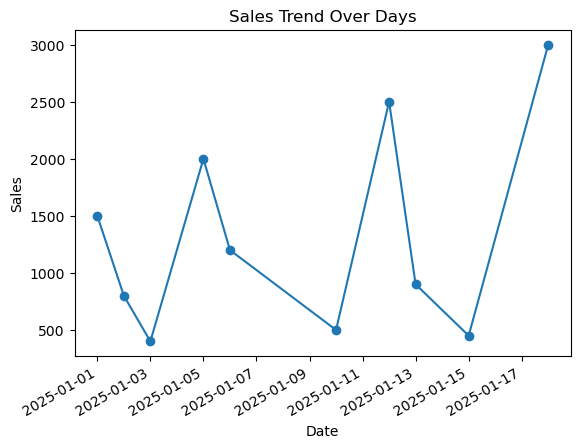

In [31]:
df.groupby("Date")["Amount"].sum().plot(kind='line', marker='o')
plt.title("Sales Trend Over Days")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()